In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

In [63]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

metab_file_grouping = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv')
tf = pd.read_excel(r'..\data\raw\metabolomics\20210904_KAO_Huishi_HILIC_Tracefinder_peakAreas.xlsx', index_col=0)
tf_metab_cols = tf.columns
tf_quant_filenames = metab_file_grouping[metab_file_grouping['quant_file'] == True]['File Name'].to_list()
########### IMPORTANT, REPLACING ZEROES WITH 1E3 ##################
tf = tf.replace(0, 100)

In [42]:
fg = file_grouping.rename({'rat_label':'animal'}, axis=1).reset_index()
merge_grouping = fg[fg['quant_file'] == True].merge(metab_file_grouping, 
                    left_on=['animal', 'bg_type', 'week', 'quant_file'],
                    right_on=['animal', 'bg_type', 'week', 'quant_file'],
                    suffixes=('_lipid', '_metab'))
merge_grouping

,File Name_lipid,analytical_run_order,fr_name,animal,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance_lipid,bg,File Name_metab,analytical_order,fixed_filename,qc_file,blank_file,glucose_tolerance_metab
0,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,7,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,1076.0,FBG,True,10.0,27,2021-04-05,diabetic,71.000000,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,21,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,False,False,diabetic
1,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,8,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,1062.0,FBG,True,8.0,9,2021-03-22,impaired,52.333333,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,61,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,False,False,impaired
2,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,9,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,1093.0,FBG,True,9.0,49,2021-04-02,normal,64.000000,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,50,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,False,False,normal
3,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,10,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,1060.0,RBG,True,8.0,4,2021-03-25,impaired,225.000000,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,59,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,False,False,impaired
4,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,11,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,1091.0,FBG,True,10.0,39,2021-04-10,normal,48.500000,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,56,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,False,False,normal
5,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,12,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,1092.0,RBG,True,9.0,44,2021-04-06,impaired,70.500000,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,18,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,False,False,impaired
6,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,13,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,1093.0,RBG,True,10.0,52,2021-04-13,normal,69.500000,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,45,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,False,False,normal
7,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,14,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,1082.0,FBG,True,10.0,33,2021-04-05,diabetic,50.000000,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,41,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,False,False,diabetic
8,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,15,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,1060.0,RBG,True,9.0,6,2021-04-01,impaired,83.000000,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,False,impaired
9,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,16,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,1101.0,FBG,True,9.0,55,2021-04-02,diabetic,43.000000,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,44,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,False,False,diabetic


In [6]:
tfcorr = tf.corr('kendall')

<Figure size 1080x1080 with 0 Axes>

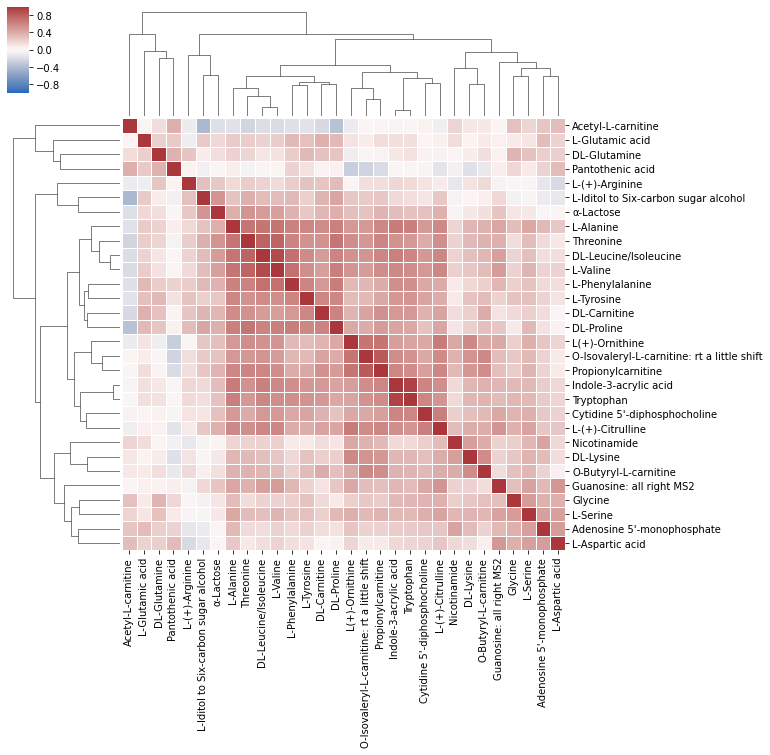

<Figure size 1080x1080 with 0 Axes>

In [11]:
tfhm = sns.clustermap(tfcorr, vmin=-1, vmax=1, annot=False,
                      cmap='vlag', linewidths=0.75)
plt.figure(figsize=(15, 15))

In [72]:
lip_met_map = dict(zip(merge_grouping[ 'File Name_metab'], merge_grouping['fr_name']))
lip_met_map

{'20210831_KAO_HILIC_T1076M_20210405_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27)',
 '20210831_KAO_HILIC_T1062M_20210322_8wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9)',
 '20210831_KAO_HILIC_T1093M_20210402_9wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49)',
 '20210831_KAO_HILIC_T1060M_20210325_8wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4)',
 '20210831_KAO_HILIC_T1091M_20210410_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39)',
 '20210831_KAO_HILIC_T1092M_20210406_9wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44)',
 '20210831_KAO_HILIC_T1093M_20210413_10wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52)',
 '20210831_KAO_HILIC_T1082M_20210405_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33)',
 '20210831_KAO_HILIC_T1060M_20210401_9wk_RBG': '20210729_AJ_Toh_Ra

In [74]:
tft = tf.T
tft = tft[tf_quant_filenames].rename(lip_met_map, axis=1)

In [80]:
combined_corr = fr_filt[fr_quant_filenames_in_analytical_order].append(tft, sort=True).T.corr('kendall')
combined_corr

,unknown_679.05463_0.536,unknown_641.1087_0.537,unknown_951.15973_0.541,unknown_329.03067_0.542,unknown_969.13147_0.544,unknown_623.13641_0.546,unknown_291.08359_0.551,unknown_352.99652_0.553,unknown_247.09372_0.554,unknown_605.14441_0.555,...,L-Tyrosine,L-Valine,Nicotinamide,O-Butyryl-L-carnitine,O-Isovaleryl-L-carnitine: rt a little shift,Pantothenic acid,Propionylcarnitine,Threonine,Tryptophan,α-Lactose
unknown_679.05463_0.536,1.000000,0.477966,0.338983,0.355932,0.267797,0.419209,0.327684,0.192090,0.281356,0.236158,...,0.124294,0.046328,0.119774,0.152542,0.140113,-0.297175,0.136723,0.082486,0.029379,0.010169
unknown_641.1087_0.537,0.477966,1.000000,0.375141,0.398870,0.358192,0.604520,0.503955,0.259887,0.435028,0.387571,...,-0.036158,-0.109605,0.146893,0.030508,-0.027119,-0.084746,-0.059887,-0.118644,-0.101695,-0.134463
unknown_951.15973_0.541,0.338983,0.375141,1.000000,0.280226,0.427119,0.501695,0.543503,0.179661,0.580791,0.508475,...,0.161582,0.189831,0.037288,0.061017,0.134463,-0.117514,0.133333,0.158192,0.120904,0.018079
unknown_329.03067_0.542,0.355932,0.398870,0.280226,1.000000,0.297175,0.227119,0.268927,0.433898,0.249718,0.123164,...,0.169492,0.096045,-0.061017,0.136723,0.230508,-0.292655,0.184181,0.136723,0.187571,0.019209
unknown_969.13147_0.544,0.267797,0.358192,0.427119,0.297175,1.000000,0.435028,0.420339,0.122034,0.383051,0.331073,...,0.067797,0.141243,0.099435,-0.003390,0.063277,-0.206780,0.032768,0.114124,0.090395,0.032768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pantothenic acid,-0.297175,-0.084746,-0.117514,-0.292655,-0.206780,-0.066667,0.058757,-0.074576,0.050847,0.105085,...,-0.029379,-0.141243,-0.099435,-0.229379,-0.359322,1.000000,-0.328814,-0.213559,-0.099435,-0.132203
Propionylcarnitine,0.136723,-0.059887,0.133333,0.184181,0.032768,-0.062147,-0.063277,0.036158,-0.039548,-0.114124,...,0.424859,0.525424,0.223729,0.484746,0.806780,-0.328814,1.000000,0.624859,0.492655,0.360452
Threonine,0.082486,-0.118644,0.158192,0.136723,0.114124,-0.046328,0.018079,0.015819,0.068927,0.001130,...,0.481356,0.767232,0.194350,0.328814,0.533333,-0.213559,0.624859,1.000000,0.472316,0.468927
Tryptophan,0.029379,-0.101695,0.120904,0.187571,0.090395,-0.103955,-0.028249,0.053107,-0.004520,-0.047458,...,0.557062,0.508475,0.028249,0.262147,0.457627,-0.099435,0.492655,0.472316,1.000000,0.257627


In [82]:
combined_corr.to_csv(r'..\data\interim\combined_metab_lipid_kendall_correlation.csv')

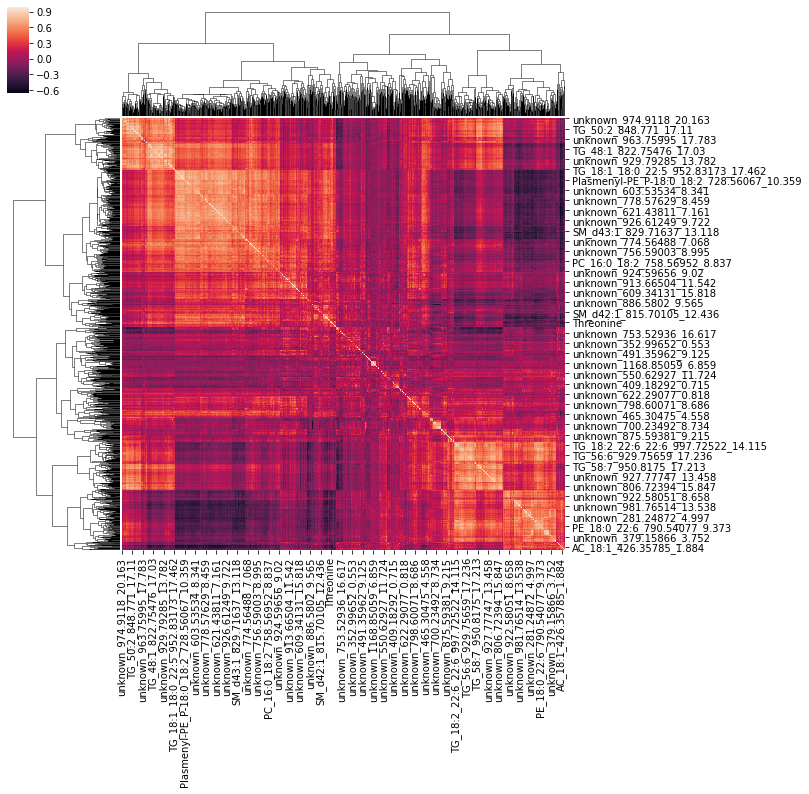

In [81]:
sns.clustermap(combined_corr)

In [30]:
import pymsfilereader
from statistics import median

rf = pymsfilereader.MSFileReader(r'D:\nile_rat_multiomics\data\raw\lipidomics\20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw')



In [20]:
rf.GetMSOrderForScanNum(0)

1

In [40]:
rf.GetScanHeaderInfoForScanNum(1)['TIC']

1061301.1

In [36]:
(rf.GetMassListFromScanNum(1)[0][1])

(0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 870.0029907226562,
 1455.0115966796875,
 1614.597900390625,
 1210.8140869140625,
 550.6863403320312,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 975.3119506835938,
 1797.6336669921875,
 2122.625,
 1691.9617919921875,
 870.328857421875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 656.5678100585938,
 1288.2142333984375,
 1611.1044921875,
 1381.13330078125,
 772.30810546875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 269.8367614746094,
 1240.843505859375,
 5160.52734375,
 6567.2041015625,
 5115.33544921875,
 2513.05908203125,
 0.0,
 0.0,
 0.0,
 616.3969116210938,
 2487.417724609375,
 2652.264404296875,
 1455.686767578125,
 675.36767578125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 44.35694885253906,
 911.9783325195312,
 3364.202880859375,
 6661.81005859375,
 10080.736328125,
 9820.7177734375,
 6242.3154296875,
 2923.286865234375,
 592.310546875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 790.5175170898438,
 1336

In [41]:
ms1_total_intensity_list = []

total_max = 0
max_tic = 0

for i in range(1, rf.LastSpectrumNumber, ):
    if rf.GetMSOrderForScanNum(i) == 1:
        mass_list = rf.GetMassListFromScanNum(i)[0][1]
        total_intensity = sum(mass_list)
        ms1_total_intensity_list.append(total_intensity)

        
        
        max_intensity = max(mass_list)
        if max_intensity > total_max:
            total_max = max_intensity
            
        if rf.GetScanHeaderInfoForScanNum(i)['TIC'] > max_tic:
            max_tic = rf.GetScanHeaderInfoForScanNum(i)['TIC']
        
        
print(median(ms1_total_intensity_list))
print(total_max)
print(max_tic)

33830421.04202223
224532144.0
413229120.0


Text(0, 0.5, 'number of scans')

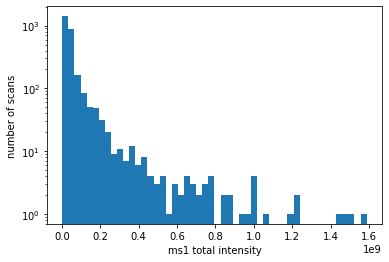

In [63]:
import matplotlib.pyplot as plt
# plt.xscale('log')
plt.yscale('log')
plt.hist(ms1_total_intensity_list, bins=50)
ax = plt.gca()
plt.xlabel('ms1 total intensity')
plt.ylabel('number of scans')

In [52]:
ms1_total_intensity_list

[3983479.95470047,
 4126131.1558594704,
 4262062.297125816,
 4904748.479049683,
 4097705.3924999237,
 4484533.237933159,
 4014374.0347186923,
 4413090.273082733,
 4280934.403457642,
 4718189.1094379425,
 4383920.1258125305,
 4556504.640295029,
 4105380.9269123077,
 4611460.214609444,
 4412359.776208878,
 4638642.161142826,
 4391921.92498672,
 4315890.016906738,
 4234754.202792972,
 4419189.801195145,
 4116921.750310898,
 4178950.1835746765,
 4195616.523674011,
 4443261.720359802,
 4368028.746545792,
 4326313.990571499,
 4440375.541042805,
 4635385.640730143,
 4246745.003452003,
 4917975.561889648,
 4515874.509599686,
 4851164.213189125,
 4412675.421015263,
 4818701.004081726,
 4386689.447919846,
 4499400.427754402,
 4596619.996593952,
 4702583.1244392395,
 4361510.104909897,
 4555579.165172577,
 4624018.894935608,
 4744322.835302353,
 4668464.886313677,
 5228892.8507733345,
 4845019.367460251,
 4746108.797758102,
 4842012.032402992,
 4905975.460783482,
 4653617.004796028,
 5103996.0315